In [47]:
import sys
!{sys.executable} -m pip  install --quiet duckdb duckdb-engine ipython-sql sqlalchemy python-snappy pyarrow memray pandas watermark ipywidgets bs4 polars rich humanize matplotlib

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [48]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [49]:
%config SqlMagic.autopandas = True
%config SqlMagic.feedback = False
%config SqlMagic.displaycon = False

In [50]:
%sql duckdb:///my-db.duckdb.db

    read_json_objects('test.json')

In [85]:
# Table created from CSV file 
%sql CREATE TABLE goodreads AS SELECT * FROM '/Users/vicki/viberary/viberary/notebooks/goodreads.csv';
%sql DESCRIBE goodreads;

,column_name,column_type,null,key,default,extra
0,column00,INTEGER,YES,None,None,None
1,asin,VARCHAR,YES,None,None,None
2,authors,VARCHAR,YES,None,None,None
3,average_rating,DOUBLE,YES,None,None,None
4,book_id,INTEGER,YES,None,None,None
5,country_code,VARCHAR,YES,None,None,None
6,description,VARCHAR,YES,None,None,None
7,edition_information,VARCHAR,YES,None,None,None
8,format,VARCHAR,YES,None,None,None
9,image_url,VARCHAR,YES,None,None,None


In [53]:
# Creating from JSON file
%sql CREATE TABLE goodreads_json AS SELECT * FROM read_json_objects('/Users/vicki/viberary/viberary/jsonparquet/src/main/resources/goodreads_books.json');

,Count
0,2360655


In [69]:
# Creating from parquet directory
%sql CREATE TABLE goodreads_pq AS SELECT * FROM '/Users/vicki/Downloads/spark-3.3.1-bin-hadoop3/goodreads_schema/*.parquet';

,Count
0,2360655


In [70]:
# Parquet file does not correctly map column types
%sql DESCRIBE goodreads_pq;

,column_name,column_type,null,key,default,extra
0,asin,VARCHAR,YES,None,None,None
1,authors,"STRUCT(author_id VARCHAR, role VARCHAR)[]",YES,None,None,None
2,average_rating,VARCHAR,YES,None,None,None
3,book_id,VARCHAR,YES,None,None,None
4,country_code,VARCHAR,YES,None,None,None
5,description,VARCHAR,YES,None,None,None
6,edition_information,VARCHAR,YES,None,None,None
7,format,VARCHAR,YES,None,None,None
8,image_url,VARCHAR,YES,None,None,None
9,is_ebook,VARCHAR,YES,None,None,None


In [80]:
%sql ALTER TABLE goodreads_pq ALTER book_id TYPE INTEGER;\
ALTER TABLE goodreads_pq ALTER num_pages TYPE INTEGER;
# ALTER TABLE goodreads_pq ALTER ratings_count TYPE INTEGER;\
# ALTER TABLE goodreads_pq ALTER text_reviews_count TYPE INTEGER;\
# ALTER TABLE goodreads_pq ALTER work_id TYPE INTEGER;\

(duckdb.ConversionException) Conversion Error: Could not convert string '' to INT32
[SQL: ALTER TABLE goodreads_pq ALTER num_pages TYPE INTEGER;]
(Background on this error at: https://sqlalche.me/e/14/9h9h)


In [ ]:
%sql DESCRIBE goodreads_pq;

In [44]:
%sql select count(*) as total_books from goodreads;

,total_books
0,2360655


In [57]:
# JSON also does not correctly map types
%sql select * from goodreads_json limit 1;

,json
0,"{""isbn"": ""0312853122"", ""text_reviews_count"": ""..."


In [38]:
%sql my_df << SELECT num_pages, count(*) AS total_books \
FROM goodreads \
GROUP BY num_pages \
ORDER BY count(*) desc;

Returning data to local variable my_df


In [83]:
%sql my_df << SELECT try_cast(num_pages as INTEGER), count(*) AS total_books \
FROM goodreads_pq \
GROUP BY num_pages \
ORDER BY count(*) desc;

Returning data to local variable my_df


In [84]:
my_df

,TRY_CAST(num_pages AS INTEGER),total_books
0,NaN,764133
1,32.0,34947
2,320.0,29945
3,256.0,29859
4,224.0,28978
...,...,...
2547,10416.0,1
2548,3203.0,1
2549,1852.0,1
2550,5012.0,1


<AxesSubplot:xlabel='num_pages', ylabel='total_books'>

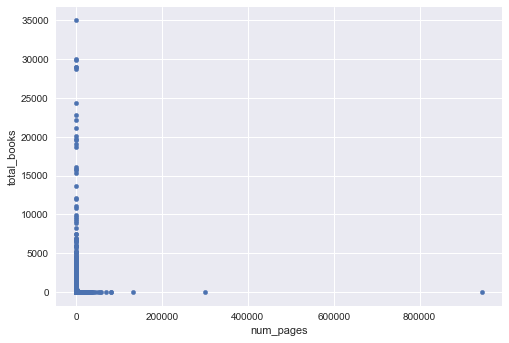

In [43]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

my_df.plot(x='num_pages', y='total_books', kind='scatter')

In [ ]:
# Throw out outliers

In [45]:
# Inspect CSV data
%sql select * from goodreads limit 10;

,column00,asin,authors,average_rating,book_id,country_code,description,edition_information,format,image_url,...,publication_year,publisher,ratings_count,series,similar_books,text_reviews_count,title,title_without_series,url,work_id
0,0,None,"[{'author_id': '604031', 'role': ''}]",4.00,5333265,US,None,None,Paperback,https://images.gr-assets.com/books/1310220028m...,...,1984.0,St. Martin's Press,3,[],[],1,W.C. Fields: A Life on Film,W.C. Fields: A Life on Film,https://www.goodreads.com/book/show/5333265-w-...,5400751
1,1,None,"[{'author_id': '626222', 'role': ''}]",3.23,1333909,US,"Anita Diamant's international bestseller ""The ...",Abridged,Audio CD,https://s.gr-assets.com/assets/nophoto/book/11...,...,2001.0,Simon & Schuster Audio,10,[],['8709549' '17074050' '28937' '158816' '228563...,6,Good Harbor,Good Harbor,https://www.goodreads.com/book/show/1333909.Go...,1323437
2,2,B00071IKUY,"[{'author_id': '10333', 'role': ''}]",4.03,7327624,US,Omnibus book club edition containing the Ladie...,Book Club Edition,Hardcover,https://images.gr-assets.com/books/1304100136m...,...,1987.0,"Nelson Doubleday, Inc.",140,['189911'],['19997' '828466' '1569323' '425389' '1176674'...,7,"The Unschooled Wizard (Sun Wolf and Starhawk, ...","The Unschooled Wizard (Sun Wolf and Starhawk, ...",https://www.goodreads.com/book/show/7327624-th...,8948723
3,3,None,"[{'author_id': '9212', 'role': ''}]",3.49,6066819,US,Addie Downs and Valerie Adler were eight when ...,None,Hardcover,https://s.gr-assets.com/assets/nophoto/book/11...,...,2009.0,Atria Books,51184,[],['6604176' '6054190' '2285777' '82641' '756945...,3282,Best Friends Forever,Best Friends Forever,https://www.goodreads.com/book/show/6066819-be...,6243154
4,4,None,"[{'author_id': '149918', 'role': ''}]",3.40,287140,US,None,None,None,https://images.gr-assets.com/books/1413219371m...,...,NaN,None,15,[],[],5,Runic Astrology: Starcraft and Timekeeping in ...,Runic Astrology: Starcraft and Timekeeping in ...,https://www.goodreads.com/book/show/287140.Run...,278577
5,5,None,"[{'author_id': '3041852', 'role': ''}]",4.13,287141,US,"Relates in vigorous prose the tale of Aeneas, ...",None,Paperback,https://s.gr-assets.com/assets/nophoto/book/11...,...,2006.0,Yesterday's Classics,46,[],[],7,The Aeneid for Boys and Girls,The Aeneid for Boys and Girls,https://www.goodreads.com/book/show/287141.The...,278578
6,6,None,"[{'author_id': '215594', 'role': ''}]",4.38,378460,US,None,None,Paperback,https://s.gr-assets.com/assets/nophoto/book/11...,...,1979.0,Berkley Publishing Group,12,[],[],4,The Wanting of Levine,The Wanting of Levine,https://www.goodreads.com/book/show/378460.The...,368291
7,7,None,"[{'author_id': '19158', 'role': ''}]",4.22,6066812,US,"To Kara's astonishment, she discovers that a p...",None,Paperback,https://images.gr-assets.com/books/1316637798m...,...,2009.0,Seven Seas,98,['151854'],['948696' '439885' '274955' '12978730' '372986...,6,All's Fairy in Love and War (Avalon: Web of Ma...,All's Fairy in Love and War (Avalon: Web of Ma...,https://www.goodreads.com/book/show/6066812-al...,701117
8,8,None,"[{'author_id': '5807700', 'role': ''}]",3.86,34883016,US,Secrets. Sometimes keeping them in confidence ...,None,ebook,https://images.gr-assets.com/books/1493525974m...,...,2017.0,Gone Writing Publishing,5,[],[],4,Playmaker: A Venom Series Novella,Playmaker: A Venom Series Novella,https://www.goodreads.com/book/show/34883016-p...,56135087
9,9,None,"[{'author_id': '2983296', 'role': ''}\n {'auth...",3.81,287149,US,"Wisdom, humor, and dark observations by the fo...",None,Paperback,https://images.gr-assets.com/books/1328768789m...,...,2000.0,Feral House,986,[],['287151' '1104760' '1172822' '440292' '287082...,39,The Devil's Notebook,The Devil's Notebook,https://www.goodreads.com/book/show/287149.The...,278586
